In [1]:
import numpy as np
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from models.UNet2 import *


In [ ]:
file_imgs = os.path.join("/media/bot/DANE/MED_DATASETS/github_data/kits19/", "images_smaller")
file_lab = os.path.join("/media/bot/DANE/MED_DATASETS/github_data/kits19/", "labels_smaller")

np.save(file_imgs, new_images)
np.save(file_lab, new_labels)

In [3]:
x_train, x_test_valid, y_train, y_test_valid = train_test_split(images, labels, test_size=0.4, random_state=4)
x_valid, x_test, y_valid, y_test = train_test_split(x_test_valid, y_test_valid, test_size=0.5, random_state=4)

print(x_train.shape, y_train.shape)

(120, 512, 512, 1) (120, 512, 512, 2)


In [4]:
loaded_model = tf.keras.models.load_model('saved_models/UNet_model_300_100', custom_objects={"dice_coef_multilabel": dice_coef_multilabel, "iou_multilabel": iou_multilabel})
loaded_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 512, 512, 64) 640         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 512, 512, 64) 36928       conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 256, 256, 64) 0           conv2d_1[0][0]                   
______________________________________________________________________________________________

In [5]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from data_utils import *


o = Conv2D(2, (1,1), activation ='sigmoid', padding = 'same', kernel_initializer = 'glorot_normal', name='sigmoid')(loaded_model.layers[-2].output)
from tensorflow.keras.models import Model

model2 = Model(inputs=loaded_model.input, outputs=o)
model2.summary()
model2.compile(loss = 'binary_crossentropy', optimizer = Adam(learning_rate = 2e-4), metrics = [dice_coef_multilabel, iou_multilabel])

In [6]:
from tensorflow.keras.models import Model

model2 = Model(inputs=loaded_model.input, outputs=o)
model2.summary()
model2.compile(loss = 'binary_crossentropy', optimizer = Adam(learning_rate = 2e-4), metrics = [dice_coef_multilabel, iou_multilabel])

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 512, 512, 64) 640         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 512, 512, 64) 36928       conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 256, 256, 64) 0           conv2d_1[0][0]                   
______________________________________________________________________________________________

In [7]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="saved_models/UNet_kidney",
    save_weights_only=False,
    monitor='val_dice_coef_multilabel',
    mode='max',
    save_best_only=True,
    save_freq="epoch")



history = model2.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs = 20, batch_size = 2, callbacks=[model_checkpoint_callback])


Epoch 1/20
60/60 [==============================] - 916s 15s/step - loss: 437.9092 - dice_coef_multilabel: 0.0298 - iou_multilabel: 0.0033 - val_loss: 0.1338 - val_dice_coef_multilabel: 0.0435 - val_iou_multilabel: 0.0231
INFO:tensorflow:Assets written to: saved_models/UNet_kidney/assets
Epoch 2/20
60/60 [==============================] - 774s 13s/step - loss: 0.0883 - dice_coef_multilabel: 0.0454 - iou_multilabel: 0.0242 - val_loss: 0.0841 - val_dice_coef_multilabel: 0.0400 - val_iou_multilabel: 0.0211
Epoch 3/20
60/60 [==============================] - 776s 13s/step - loss: 0.0581 - dice_coef_multilabel: 0.0750 - iou_multilabel: 0.0414 - val_loss: 0.0533 - val_dice_coef_multilabel: 0.0782 - val_iou_multilabel: 0.0430
INFO:tensorflow:Assets written to: saved_models/UNet_kidney/assets
Epoch 4/20
60/60 [==============================] - 859s 14s/step - loss: 0.0438 - dice_coef_multilabel: 0.1183 - iou_multilabel: 0.0697 - val_loss: 0.0409 - val_dice_coef_multilabel: 0.1273 - val_iou_mul

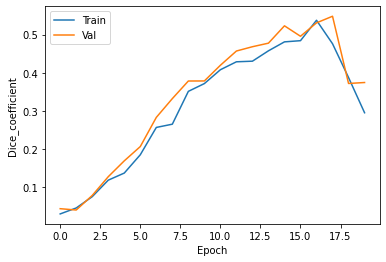

In [8]:
plot_dice(history)

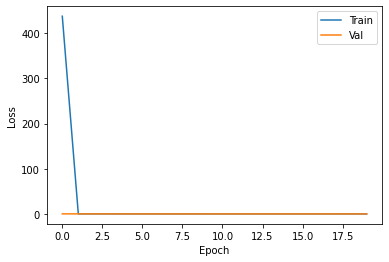

In [9]:
plot_loss(history)

In [11]:
preds = model2.predict(x_test)

In [17]:
print("TEST DICE_COEF: ", dice_coef(y_test.astype('float32'), preds).numpy())
print("TEST IoU: ", iou(y_test.astype('float32'), preds).numpy())

TEST DICE_COEF:  0.78772396
TEST IoU:  0.6497893


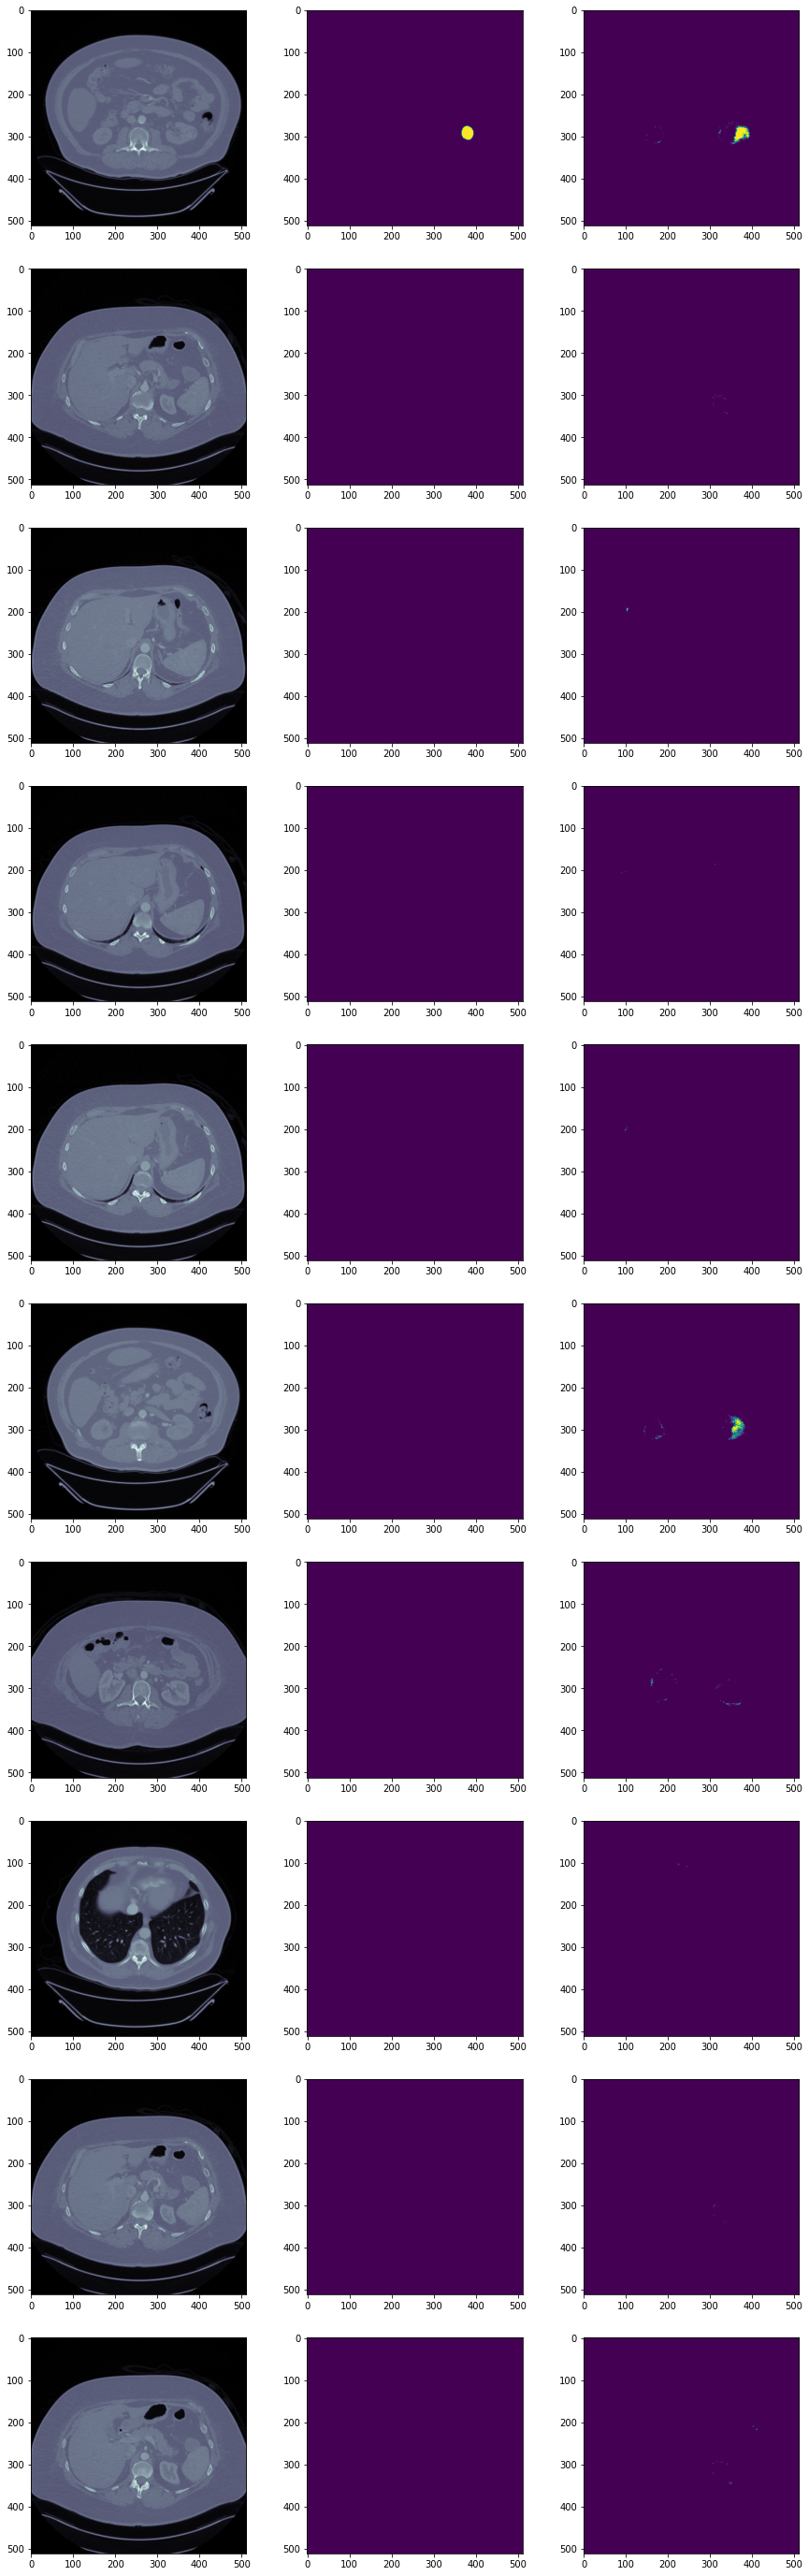

In [13]:
fig, ax = plt.subplots(10, 3, figsize=(15, 50))
for i in range(10):
    ax[i, 0].imshow(x_test[i].squeeze(), cmap=plt.cm.bone)
    ax[i, 1].imshow(y_test[i, :, :, 1].squeeze())
    ax[i, 2].imshow(preds[i, :, :, 1].squeeze())

In [2]:
#LOADING DATA FOR NEXT TRAINING
images = np.load("/media/bot/DANE/MED_DATASETS/NARZ_ZAGRO2/FILES/imgs16.npy")[400:600, :, :, :]
labels = np.load("/media/bot/DANE/MED_DATASETS/NARZ_ZAGRO2/FILES/masks16.npy")[400:600, :, :, :]

In [3]:
x_train, x_test_valid, y_train, y_test_valid = train_test_split(images, labels, test_size=0.4, random_state=4)
x_valid, x_test, y_valid, y_test = train_test_split(x_test_valid, y_test_valid, test_size=0.5, random_state=4)


N = images.shape[0]
W = images.shape[1]
H = images.shape[2]
C = labels.shape[3]

In [5]:
model2 = tf.keras.models.load_model('saved_models/UNet_kidney', custom_objects={"dice_coef_multilabel": dice_coef_multilabel, "iou_multilabel": iou_multilabel})
